geekforgeek

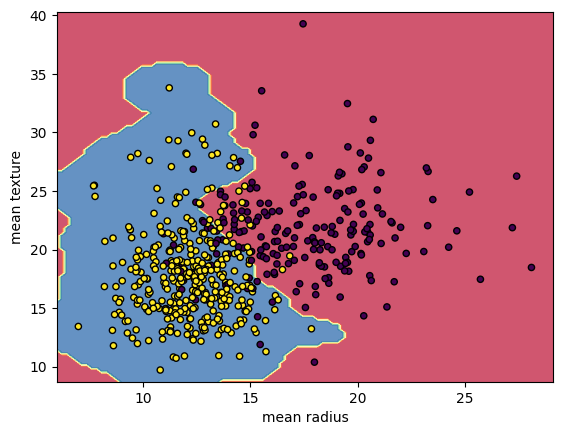

In [1]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

gork

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



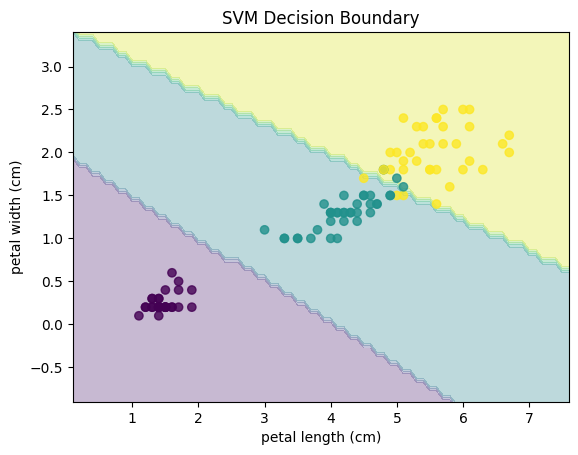

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load and prepare dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Use petal length and width for 2D visualization
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize decision boundaries
def plot_decision_boundary(X, y, classifier, scaler):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    X_grid = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = classifier.predict(X_grid)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train, y_train, svm, scaler)

In [ ]:
chatgpt

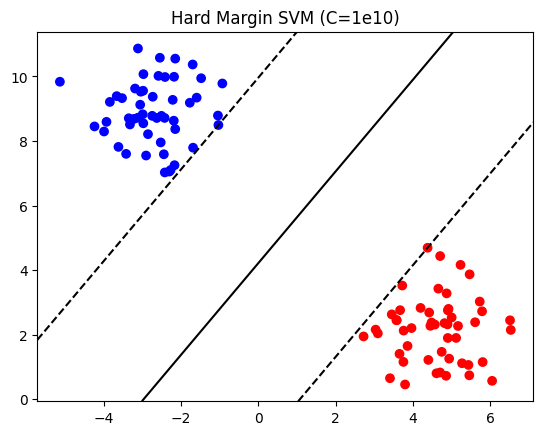

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate linearly separable data
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = y * 2 - 1  # Convert labels to {-1, 1}

# Hard Margin SVM (C is very large)
hard_margin_clf = SVC(kernel='linear', C=1e10)
hard_margin_clf.fit(X, y)

# Plot
def plot_svm(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.title(title)
    plt.show()

plot_svm(hard_margin_clf, X, y, "Hard Margin SVM (C=1e10)")


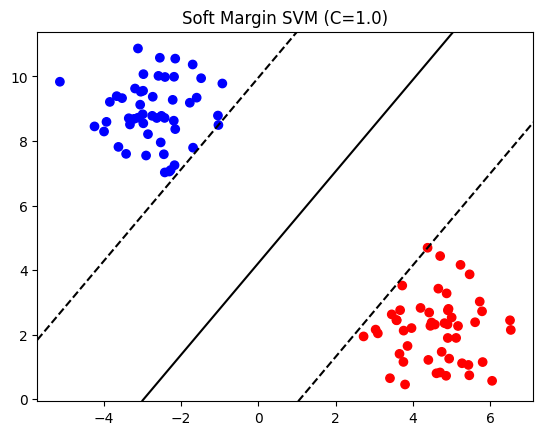

In [5]:
# Soft Margin SVM (C is smaller)
soft_margin_clf = SVC(kernel='linear', C=1.0)
soft_margin_clf.fit(X, y)

plot_svm(soft_margin_clf, X, y, "Soft Margin SVM (C=1.0)")


In [6]:
# Predict on new data
new_points = [[3, 3], [7, 7]]
print("Hard Margin Predictions:", hard_margin_clf.predict(new_points))
print("Soft Margin Predictions:", soft_margin_clf.predict(new_points))


Hard Margin Predictions: [1 1]
Soft Margin Predictions: [1 1]


chatgpt again

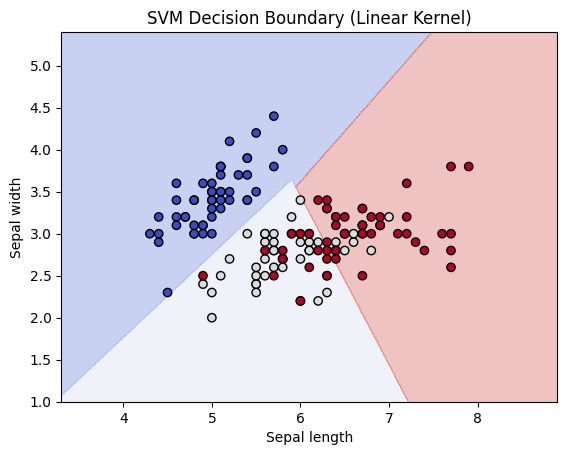

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Fit the SVM model
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Plotting decision boundaries
def plot_decision_boundary(X, y, model):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('SVM Decision Boundary (Linear Kernel)')
    plt.show()

# Call the function
plot_decision_boundary(X, y, model)
